In [1]:
import pandas as pd

In [22]:
import matplotlib.pyplot as plt


In [2]:
import folium

In [3]:
tours = pd.read_csv('data/24-04-24/Tour.csv')

In [4]:
reklamationen = pd.read_csv('data/24-04-24/Reklamationen.csv')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_54820/720056129.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  reklamationen = pd.read_csv('data/24-04-24/Reklamationen.csv')


In [5]:
tours.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,12964,10.11.2023,MONU,1,TP00335
1,38897,07.02.2022,MONU,1,TP00335
2,73190,21.10.2022,MONU,1,TP00335
3,54020,06.08.2021,MONU,1,TP00335
4,78256,27.01.2023,MONU,1,TP00335


In [6]:
tours_reklmationen = pd.merge(tours, reklamationen[reklamationen.Reklamationsgrund == 901.0], on='%TOURNR', how='outer')

In [7]:
auftrag = pd.read_csv('data/24-04-24/Auftr„ge.csv')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_54820/2583555478.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  auftrag = pd.read_csv('data/24-04-24/Auftr„ge.csv')


In [8]:
auftrag.head()

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
1,32437,56418,A221790083,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
2,82408,56418,A231849217,23.05.2023,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
3,46532,56418,A213241021,21.09.2021,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
4,25173,56418,A220934859,15.03.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen


In [9]:
tours_reklmation_auftrag = pd.merge(tours_reklmationen[tours_reklmationen.Reklamationsgrund == 901.0], auftrag, on='%TOURNR', how='inner')

In [10]:
einsatzstelle = pd.read_csv('data/24-04-24/Einsatzstelle.csv')

In [11]:
einsatzstelle.head()

,%DEBITOR%EINSATZSTELLE,Adresse,Ort,PLZ,%EINSATZSTELLENR,Location
0,33610,Ringstr. 8A,Berlin,12203,1,"[13.3086847,52.4368641]"
1,121533,Stahnsdorfer Damm 12,Berlin,14109,2,"[13.1747222,52.4154794]"
2,135160,Anhaltinerstr. 7,Berlin,14163,3,"[13.2567496,52.4308445]"
3,137834,Ilsensteinweg 4A,Berlin,14129,4,"[13.22047,52.4367907]"
4,118088,Claszeile 75,Berlin,14165,5,"[13.2596225,52.4173589]"


In [12]:
tours_reklmation_auftrag_einsatzstelle = pd.merge(tours_reklmation_auftrag, einsatzstelle, on='%DEBITOR%EINSATZSTELLE', how='inner')

In [13]:
tours_reklmation_auftrag_einsatzstelle.Location = tours_reklmation_auftrag_einsatzstelle.Location.str.split(',')

In [14]:
tours_reklmation_auftrag_einsatzstelle['longitude'] = tours_reklmation_auftrag_einsatzstelle.Location.apply(lambda x: x[0][1:])

In [15]:
tours_reklmation_auftrag_einsatzstelle['latitude'] = tours_reklmation_auftrag_einsatzstelle.Location.apply(lambda x: x[1][:-1])

In [16]:
tours_reklmation_auftrag_einsatzstelle.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,%DEBITOR%EINSATZSTELLE,...,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel,Adresse,Ort,PLZ,%EINSATZSTELLENR,Location,longitude,latitude
0,231,19.12.2022,MONU,88.0,TP00118,A224429705,901.0,Tour nicht geschafft,Tourüberlastung,3310,...,M610200,"5.01 Altpapier, gemischt",1100 L MGB,Bergfelder Weg 8,Berlin,13465,84201,"[[13.2945, 52.64293]]",13.2945,52.64293
1,231,19.12.2022,MONU,88.0,TP00118,A224429705,901.0,Tour nicht geschafft,Tourüberlastung,3300,...,M610200,"5.01 Altpapier, gemischt",1100 L MGB,Bergfelder Weg 12,Berlin,13465,84257,"[[13.29518, 52.64297]]",13.29518,52.64297
2,231,19.12.2022,MONU,88.0,TP00118,A224429705,901.0,Tour nicht geschafft,Tourüberlastung,3301,...,M610200,"5.01 Altpapier, gemischt",1100 L MGB,Bergfelder Weg 4,Berlin,13465,84197,"[[13.2932399, 52.6427086]]",13.2932399,52.6427086
3,231,19.12.2022,MONU,88.0,TP00118,A224429705,901.0,Tour nicht geschafft,Tourüberlastung,100531,...,M610200,"5.01 Altpapier, gemischt",1100 L MGB,Gollanczstr. 18,Berlin,13465,88252,"[[13.287746, 52.638056]]",13.287746,52.638056
4,231,19.12.2022,MONU,88.0,TP00118,A224429705,901.0,Tour nicht geschafft,Tourüberlastung,44248,...,M610200,"5.01 Altpapier, gemischt",1100 L MGB,Wiltinger Str. 1,Berlin,13465,88773,"[[13.2899236, 52.6345862]]",13.2899236,52.6345862


In [26]:
percentages = tours_reklmation_auftrag_einsatzstelle['Reklamationsuntergrund Beschreibung'].value_counts(dropna= False,  normalize=True) * 100

In [27]:
percentages

Reklamationsuntergrund Beschreibung
Tourüberlastung                56.940749
NaN                            35.128335
Fahrzeugausfall                 2.090734
Zeitarbeiterproblem             1.940374
Krankheitsfall auf Tour         1.301761
Fahrzeug voll                   1.126337
Witterung                       0.707902
Stau                            0.586741
Straßensperren Unfall           0.138235
Straßensperren Staatsbesuch     0.038833
Name: proportion, dtype: float64

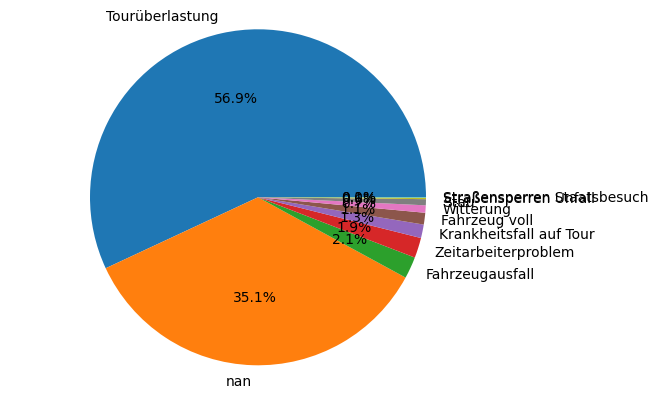

In [29]:

labels = tours_reklmation_auftrag_einsatzstelle['Reklamationsuntergrund Beschreibung'].value_counts(dropna= False).index
sizes = tours_reklmation_auftrag_einsatzstelle['Reklamationsuntergrund Beschreibung'].value_counts(dropna= False).values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [18]:
# import folium

# # Initialize a map centered around the mean of your coordinates
# m = folium.Map(location=[tours_reklmation_auftrag_einsatzstelle['latitude'].mean(), tours_reklmation_auftrag_einsatzstelle['longitude'].mean()], zoom_start=13)

# # Add a marker for every record in the filtered data, use a clustered view
# for index, row in tours_reklmation_auftrag_einsatzstelle.iterrows():
#     folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# # Display the map
# m